# *FASHION APPAREL CLASSIFICATION USING DL CNN*

### *BY SRIKAR SEETHIRAJU*

## Aim : Predicting the output class of a 28x28 pixel image in the form of CSV file.

## Method of approach used : Convolutional Neural Network

- STEP #1: IMPORTING DATA
- STEP #2: VISUALISATION OF THE DATASET
- STEP #3: DATA PREPROCESSING
- STEP #4: MODEL TRAINING
- STEP #5: EVALUATING THE MODEL

## Project Decription :

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows: 

- 0 -> T-shirt/top
- 1 -> Trouser
- 2 -> Pullover
- 3 -> Dress
- 4 -> Coat
- 5 -> Sandal
- 6 -> Shirt
- 7 -> Sneaker
- 8 -> Bag
- 9 -> Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 

---

# STEP #1: IMPORTING DATA

### Importing Library

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Preparing a dataframe

In [2]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv')

In [3]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

---

# STEP #2: VISUALIZATION OF THE DATASET  

### Viewing an image

Text(0.5, 1.0, 'True Class = 9.0')

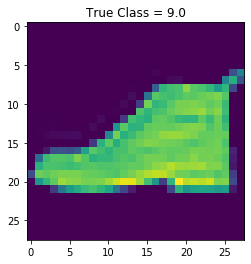

In [5]:
import random
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
plt.title("True Class = {:0.1f}".format(training[i,0]))

### Viewing more images in a grid format

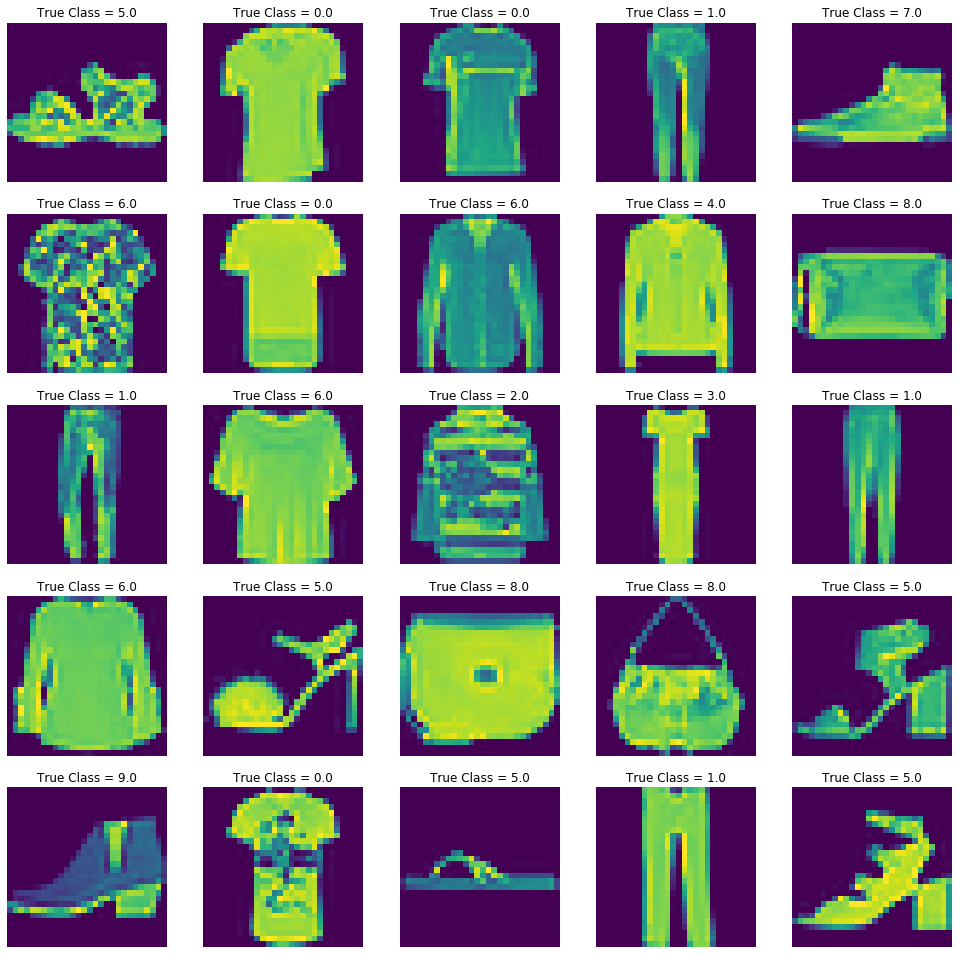

In [6]:
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()

n_training = len(training)

for i in range(0, W_grid * L_grid): 
    index = np.random.randint(0, n_training)  
    axes[i].imshow(training[index,1:].reshape(28,28))
    axes[i].set_title("True Class = {:0.1f}".format(training[index,0]))
    axes[i].axis('off')

# The decoding of 10 classes is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

---

# STEP #3: DATA PREPROCESSING

### Prepare the training and testing dataset 

In [7]:
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

### Splitting data into Validation set and Training set

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2)

### Unpack the tuple

In [9]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

---

# STEP #4: MODEL TRAINING

### Importing from TF Library

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import TensorBoard

### Building CNN

In [11]:
cnn = Sequential()

# First Layer
cnn.add(Conv2D(filters=32,kernel_size=3, input_shape = [28,28,1], activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides =2))

# Drop some neurons
cnn.add(Dropout(0.25))

# Second Layer
cnn.add(Conv2D(filters=32,kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides =2))

# Flattening
cnn.add(Flatten())

# Full connection
cnn.add(Dense(units = 32, activation = 'relu'))

# Output Layer
cnn.add(Dense(units = 10, activation = 'sigmoid'))


### Compiling the CNN

In [12]:
cnn.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['accuracy'])
cnn.fit(X_train, y_train, batch_size = 1024, epochs=25, validation_data = (X_validate, y_validate))

Epoch 1/25
47/47 [==============================] - 25s 524ms/step - loss: 1.3270 - accuracy: 0.5664 - val_loss: 0.7866 - val_accuracy: 0.7048
Epoch 2/25
47/47 [==============================] - 24s 512ms/step - loss: 0.7099 - accuracy: 0.7391 - val_loss: 0.6496 - val_accuracy: 0.7637
Epoch 3/25
47/47 [==============================] - 28s 600ms/step - loss: 0.6201 - accuracy: 0.7703 - val_loss: 0.5784 - val_accuracy: 0.7861
Epoch 4/25
47/47 [==============================] - 25s 525ms/step - loss: 0.5680 - accuracy: 0.7915 - val_loss: 0.5402 - val_accuracy: 0.7997
Epoch 5/25
47/47 [==============================] - 25s 542ms/step - loss: 0.5350 - accuracy: 0.8039 - val_loss: 0.5104 - val_accuracy: 0.8132
Epoch 6/25
47/47 [==============================] - 24s 516ms/step - loss: 0.5061 - accuracy: 0.8171 - val_loss: 0.4768 - val_accuracy: 0.8306
Epoch 7/25
47/47 [==============================] - 26s 545ms/step - loss: 0.4805 - accuracy: 0.8281 - val_loss: 0.4601 - val_accuracy: 0.8344

---

# STEP #5: EVALUATING THE MODEL

### Get the predictions for the test data

In [13]:
# predicted_classes = cnn.predict_classes(X_test)
predicted_classes = np.argmax(cnn.predict(X_test), axis=-1)

### Printing few Predictions

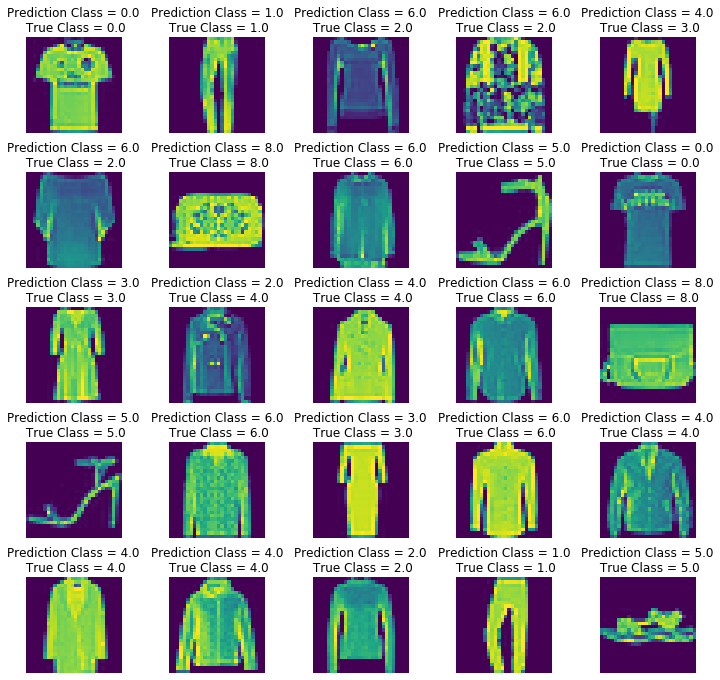

In [14]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

### Model evaluation

In [15]:
evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 2s 6ms/step - loss: 0.3464 - accuracy: 0.8796
Test Accuracy : 0.880


### Confusion Matrix

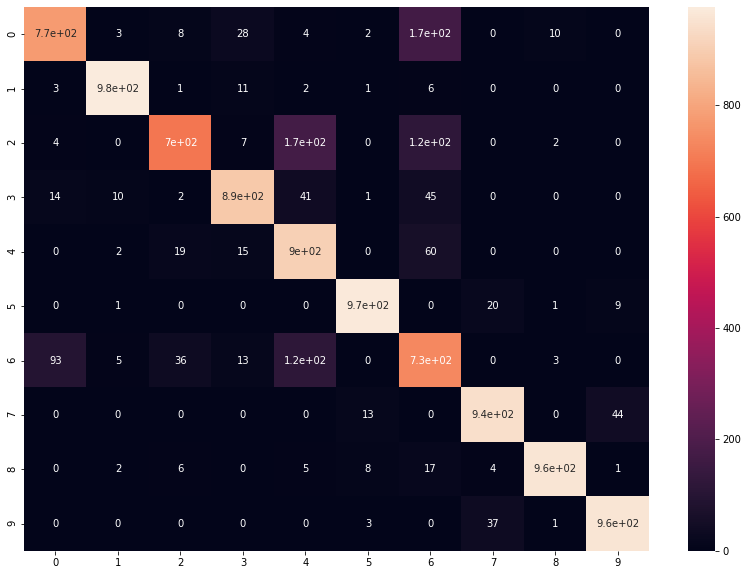

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

### Classification Report

In [17]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.77      0.82      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.91      0.69      0.79      1000
     Class 3       0.92      0.89      0.90      1000
     Class 4       0.72      0.90      0.80      1000
     Class 5       0.97      0.97      0.97      1000
     Class 6       0.64      0.73      0.68      1000
     Class 7       0.94      0.94      0.94      1000
     Class 8       0.98      0.96      0.97      1000
     Class 9       0.95      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



---

# END OF PROJECT

---